In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
print(data.isnull())

     Unnamed: 0     TV  Radio  Newspaper  Sales
0         False  False  False      False  False
1         False  False  False      False  False
2         False  False  False      False  False
3         False  False  False      False  False
4         False  False  False      False  False
..          ...    ...    ...        ...    ...
195       False  False  False      False  False
196       False  False  False      False  False
197       False  False  False      False  False
198       False  False  False      False  False
199       False  False  False      False  False

[200 rows x 5 columns]


In [5]:
s_type = []
for i in data.Sales:
  if(i>=15):
    s_type.append("High")
  elif(i<15 and i>=5):
    s_type.append("Medium")
  else:
    s_type.append("Low")

data["Sales Type"] = s_type
data.head()
  

,Unnamed: 0,TV,Radio,Newspaper,Sales,Sales Type
0,1,230.1,37.8,69.2,22.1,High
1,2,44.5,39.3,45.1,10.4,Medium
2,3,17.2,45.9,69.3,9.3,Medium
3,4,151.5,41.3,58.5,18.5,High
4,5,180.8,10.8,58.4,12.9,Medium


In [6]:
data.groupby('Sales Type').agg({'TV': ['mean', 'min', 'max'],'Radio': ['mean', 'min', 'max'],'Newspaper': ['mean', 'min', 'max']})

TV                   Radio  ...        Newspaper            
                  mean   min    max       mean  ...   max       mean  min    max
Sales Type                                      ...                             
High        213.893506  93.9  296.4  33.689610  ...  49.6  35.332468  0.3  100.9
Low           4.466667   0.7    8.6  17.766667  ...  39.6   5.133333  1.0    8.7
Medium      107.710833   5.4  290.7  16.711667  ...  49.4  28.123333  0.9  114.0

[3 rows x 9 columns]

In [7]:
a = data.values.reshape(-1,1)
print(type(a))

<class 'numpy.ndarray'>


In [8]:
data.head(3).pivot(index ='TV', columns ='Sales', values =['Sales Type'])

Sales Type              
Sales       9.3     10.4  22.1
TV                            
17.2      Medium     NaN   NaN
44.5         NaN  Medium   NaN
230.1        NaN     NaN  High

# Part B: Data modeling


In [9]:
data.iloc[::6,1] = np.nan
data.iloc[::10,3] = np.nan
data

,Unnamed: 0,TV,Radio,Newspaper,Sales,Sales Type
0,1,NaN,37.8,NaN,22.1,High
1,2,44.5,39.3,45.1,10.4,Medium
2,3,17.2,45.9,69.3,9.3,Medium
3,4,151.5,41.3,58.5,18.5,High
4,5,180.8,10.8,58.4,12.9,Medium
...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,Medium
196,197,94.2,4.9,8.1,9.7,Medium
197,198,177.0,9.3,6.4,12.8,Medium
198,199,NaN,42.0,66.2,25.5,High


In [10]:
data.fillna(0)

,Unnamed: 0,TV,Radio,Newspaper,Sales,Sales Type
0,1,0.0,37.8,0.0,22.1,High
1,2,44.5,39.3,45.1,10.4,Medium
2,3,17.2,45.9,69.3,9.3,Medium
3,4,151.5,41.3,58.5,18.5,High
4,5,180.8,10.8,58.4,12.9,Medium
...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,Medium
196,197,94.2,4.9,8.1,9.7,Medium
197,198,177.0,9.3,6.4,12.8,Medium
198,199,0.0,42.0,66.2,25.5,High


In [11]:
data = data.fillna(data.mean())
data


,Unnamed: 0,TV,Radio,Newspaper,Sales,Sales Type
0,1,148.757831,37.8,30.492222,22.1,High
1,2,44.500000,39.3,45.100000,10.4,Medium
2,3,17.200000,45.9,69.300000,9.3,Medium
3,4,151.500000,41.3,58.500000,18.5,High
4,5,180.800000,10.8,58.400000,12.9,Medium
...,...,...,...,...,...,...
195,196,38.200000,3.7,13.800000,7.6,Medium
196,197,94.200000,4.9,8.100000,9.7,Medium
197,198,177.000000,9.3,6.400000,12.8,Medium
198,199,148.757831,42.0,66.200000,25.5,High


In [12]:
X = data.iloc[:,:-2].values
y = data.iloc[:,-2].values

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaled_X = MinMaxScaler()
X = scaled_X.fit_transform(X)
X

array([[0.        , 0.50070285, 0.76209677, 0.26554285],
       [0.00502513, 0.1481231 , 0.79233871, 0.39401935],
       [0.01005025, 0.0557998 , 0.92540323, 0.60686016],
       [0.01507538, 0.50997633, 0.83266129, 0.51187335],
       [0.0201005 , 0.60906324, 0.21774194, 0.51099384],
       [0.02512563, 0.02705445, 0.9858871 , 0.65699208],
       [0.03015075, 0.50070285, 0.66129032, 0.20404573],
       [0.03517588, 0.4041258 , 0.39516129, 0.09938434],
       [0.04020101, 0.02671627, 0.04233871, 0.00615655],
       [0.04522613, 0.67331755, 0.05241935, 0.18381706],
       [0.05025126, 0.2211701 , 0.11693548, 0.26554285],
       [0.05527638, 0.72370646, 0.48387097, 0.03254178],
       [0.06030151, 0.50070285, 0.70766129, 0.5769569 ],
       [0.06532663, 0.32735881, 0.15322581, 0.06068602],
       [0.07035176, 0.68785932, 0.66330645, 0.40193492],
       [0.07537688, 0.65843761, 0.96169355, 0.46262093],
       [0.08040201, 0.22691917, 0.73790323, 1.        ],
       [0.08542714, 0.94927291,

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print(f"\nMSE: {mse}")



MSE: 9.332077441987703


In [20]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6308042454444418

In [39]:
train_sizes, train_scores, validation_scores=learning_curve( estimator=LinearRegression() , X=X_train , y=y_train)

In [40]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis=1)

[]

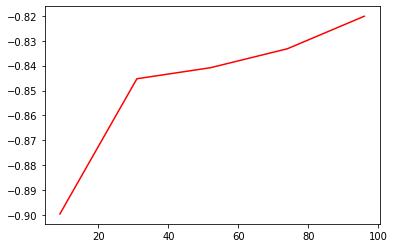

In [42]:
plt.plot(train_sizes, train_scores_mean, c='r', label='Actual scores')

plt.plot()

(80,)